# Application with new data

This tutorial demonstrates how to identify spatial domains and how to train STAGATE in batches on new EEL FISH mouse brain data , as well as using SODB and STAGATE based on pyG (PyTorch Geometric) framework.

Since the EEL FISH mouse brain has 127591 cells, each with 440 genes, this tutorial presents how to download data using SODB and also uses a batch training strategy to deal with large-scale data. 

A tutorial of a batch training strategy can be found at https://stagate.readthedocs.io/en/latest/T8_Batch.html

## Strategies for dividing subgraphs

Because we build the spatial network based on spatial location, our network can be directly divided into subgraphs in the following form.

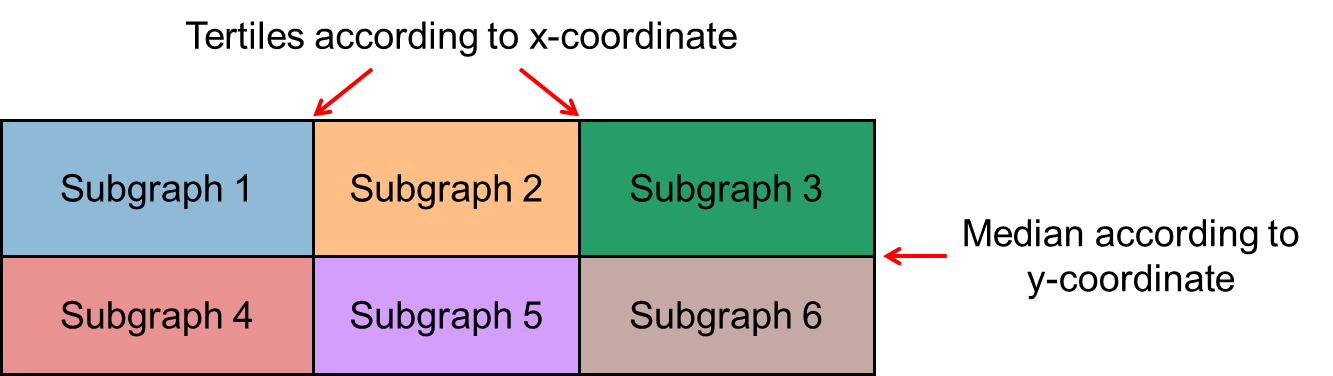

The above picture is an example of num_batch_x=3, num_batch_y=2. Specifically, we divide subgraphs according to quantiles on a single spatial coordinate.

## Import packages and set configurations

In [1]:
# Import several Python packages commonly used in data analysis and visualization:
# pandas (imported as pd) is a package for data manipulation and analysis
import pandas as pd
# numpy (imported as np) is a package for numerical computing with arrays
import numpy as np
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis
import scanpy as sc
# matplotlib.pyplot (imported as plt) is a package for data visualization
import matplotlib.pyplot as plt
# os is a package for interacting with the operating system, such as reading or writing files
import os
# sys is a package for interacting with the Python interpreter
import sys
# tqdm is a package for creating progress bars in Python, which is useful for tracking the progress of long-running loops or operations.
from tqdm import tqdm

In [2]:
# Import PyTorch
import torch
# Import STAGATE_pyG package
import STAGATE_pyG
# Import torch.nn.functional module
# "torch.nn.functional" module provides various functions that are commonly used as activations and loss functions in neural networks
import torch.nn.functional as F

/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set the PyTorch device  either available GPU or the CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Streamline development of loading spatial data with SOBD

In [4]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb


In [5]:
# Initialization
sodb = pysodb.SODB()

In [6]:
# Define the name of the dataset_name and experiment_name
dataset_name = 'Borm2022Scalable'
experiment_name = 'mouse_brain'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[mouse_brain] in dataset[Borm2022Scalable]


In [7]:
adata

AnnData object with n_obs × n_vars = 127591 × 440
    obs: 'Clusters', 'TotalMolecules', 'X', 'X_um', 'Y', 'Y_um', 'leiden'
    var: 'GeneTotal'
    uns: 'Age', 'Clusters_colors', 'Codebook', 'ColorDict', 'CreationDate', 'Cycles', 'Expansion', 'Expansion_um', 'Experiment', 'ExperimentDate', 'FOVoverlapPercentage', 'GenerationDate', 'Joke', 'LOOM_SPEC_VERSION', 'MaxHammingDist', 'Operator', 'Orientation', 'Probes', 'Protocol', 'Quality', 'RNAfile', 'Removal', 'Sample', 'Segmentation', 'Species', 'Stitching', 'StitchingChannel', 'Strain', 'System', 'Tissue', 'TotalMolecules', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'RGB', 'X_pca', 'X_umap', 'spatial', 'tSNE'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [8]:
# Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

## Dividing subgraphs

In [9]:
# Assign spatial coordinates to adata.obs['X_coor'] and adata.obs['Y_coor']
adata.obs['X_coor'] = adata.obsm['spatial'][:,0]
adata.obs['Y_coor'] = adata.obsm['spatial'][:,1]

In [10]:
# Grid setting 
num_batch_x = 4
num_batch_y = 4

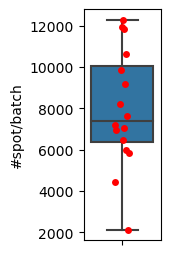

In [11]:
# The adata is divided into multiple subgraphs based on the coordinate partitioning and consolidated into a batch list
Batch_list = STAGATE_pyG.Batch_Data(adata, num_batch_x=num_batch_x, num_batch_y=num_batch_y, 
                                    spatial_key=['X_coor', 'Y_coor'], plot_Stats=True)

## Constructing the spatial network

------Calculating spatial graph...
The graph contains 495224 edges, 11834 cells.
41.8476 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 545572 edges, 11937 cells.
45.7043 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 193628 edges, 6004 cells.
32.2498 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 53426 edges, 2123 cells.
25.1653 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 305286 edges, 9155 cells.
33.3464 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 198074 edges, 5830 cells.
33.9750 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 287706 edges, 7038 cells.
40.8789 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 347420 edges, 9875 cells.
35.1818 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 169026 edges, 4434 cells.
38.1204 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 257098 edges, 6948 cells.
37.0032 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 348072 edges, 8222 cells.
42.3342 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 563444 edges, 12294 cells.
45.8308 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 258650 edges, 6475 cells.
39.9459 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 367994 edges, 7183 cells.
51.2312 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 831018 edges, 10635 cells.
78.1399 neighbors per cell on average.
------Calculating spatial graph...


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


The graph contains 614454 edges, 7606 cells.
80.7854 neighbors per cell on average.


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


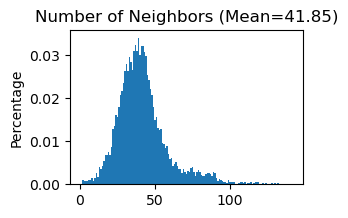

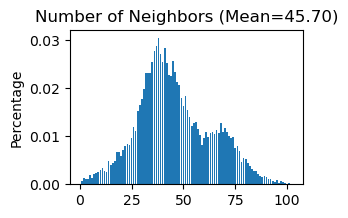

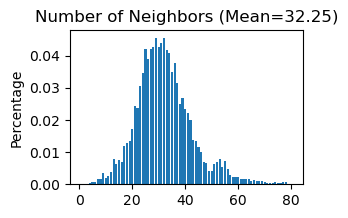

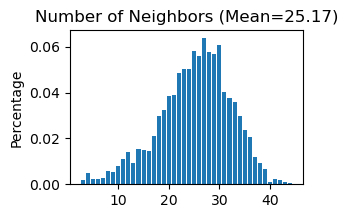

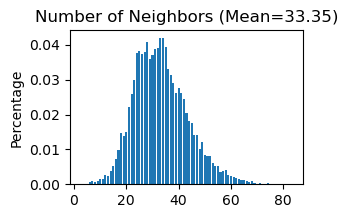

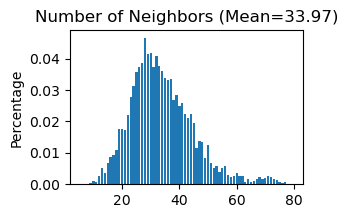

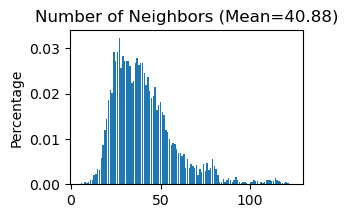

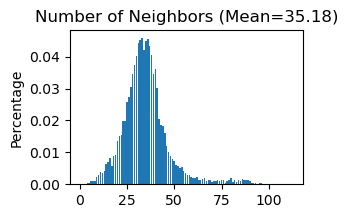

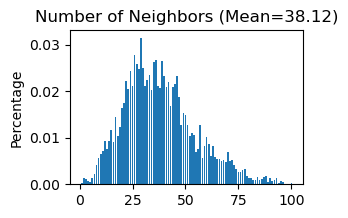

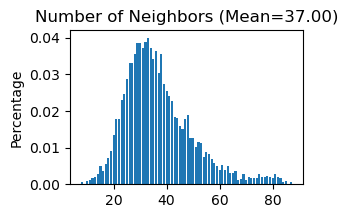

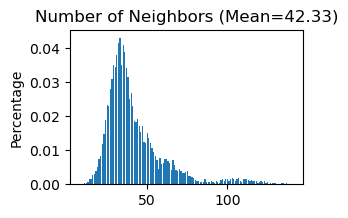

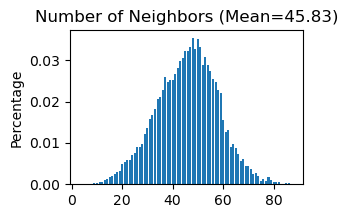

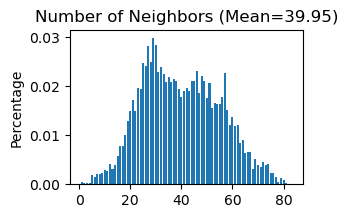

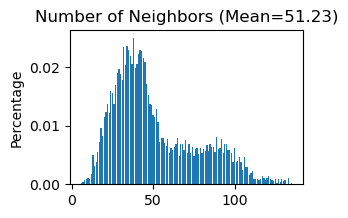

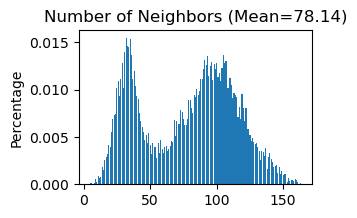

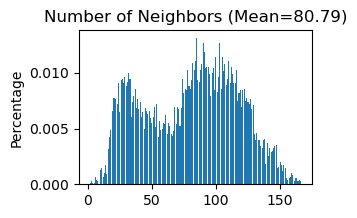

In [12]:
# Consturcting network for each batch
for temp_adata in Batch_list:
    STAGATE_pyG.Cal_Spatial_Net(temp_adata, rad_cutoff=80)
    STAGATE_pyG.Stats_Spatial_Net(temp_adata)

In [13]:
# Convert each subgraph in the Batch_list to a tensor used for training through the Transfer_pytorch_Data function, and collect them into a data list
data_list = [STAGATE_pyG.Transfer_pytorch_Data(adata) for adata in Batch_list]
for temp in data_list:
    temp.to(device)

In [14]:
# Use "STAGATE_pyG.Cal_Spatial_Net" to calculate a spatial graph with a radius cutoff of 80.
STAGATE_pyG.Cal_Spatial_Net(adata, rad_cutoff=80)

------Calculating spatial graph...
The graph contains 6019678 edges, 127591 cells.
47.1795 neighbors per cell on average.


In [15]:
# Convert the entire adata to a tensor used for evaluation
data = STAGATE_pyG.Transfer_pytorch_Data(adata)

## DataLoader for bathces

In [16]:
# Create a PyTorch Geometric DataLoader object for loading and processing graph data
from torch_geometric.loader import DataLoader

# Create a PyTorch DataLoader object named "loader" that will iterate through the "data_list"
# batch_size=1 or 2
loader = DataLoader(data_list, batch_size=1, shuffle=True)

## Running STAGATE

In [17]:
# Hyper-parameters setting
num_epoch = 500
lr=0.001
weight_decay=1e-4
hidden_dims = [512, 30]

In [18]:
# Train a STAGATE model 
model = STAGATE_pyG.STAGATE(hidden_dims = [data_list[0].x.shape[1]]+hidden_dims).to(device)

# Initializes an Adam optimizer with learning rate "lr" and weight decay "weight_decay" that will be used to update the parameters of the PyTorch model.
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [19]:
# Train a PyTorch model using mini-batch stochastic gradient descent with the Adam optimizer by iterating over the data loader "loader" for "num_epoch" epochs, computing the MSE loss between the predicted output "out" and the ground truth "batch.x", clipping the gradients to avoid exploding gradients, and updating the model parameters using the optimizer's step function.
for epoch in tqdm(range(1, num_epoch+1)):
    for batch in loader:
        model.train()
        optimizer.zero_grad()
        z, out = model(batch.x, batch.edge_index)
        loss = F.mse_loss(batch.x, out) #F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.)
        optimizer.step()

100%|██████████| 500/500 [03:07<00:00,  2.67it/s]


In [20]:
# The total network
data.to(device)

Data(x=[127591, 440], edge_index=[2, 6147269])

In [21]:
# Set the model in evaluation mode
model.eval()
# Get the hidden representation and output of the model
z, out = model(data.x, data.edge_index)

# Transfer a tensor from GPU to CPU and convert it to a numpy array
# Then assigning it to a specific key "STAGATE_rep" in adata.obsm['STAGATE']
STAGATE_rep = z.to('cpu').detach().numpy()
adata.obsm['STAGATE'] = STAGATE_rep

## Clustering and UMAP

In [22]:
# Calculate the nearest neighbors in the 'STAGATE' representation and computes the UMAP embedding.
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)

In [23]:
# Use Mclust_R to cluster cells in the 'STAGATE' representation into 13 clusters.
adata = STAGATE_pyG.mclust_R(adata, used_obsm='STAGATE', num_cluster=13)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-611.2128013610841, 15985.261156463623, 72.22414855957027, 7865.117953491211)

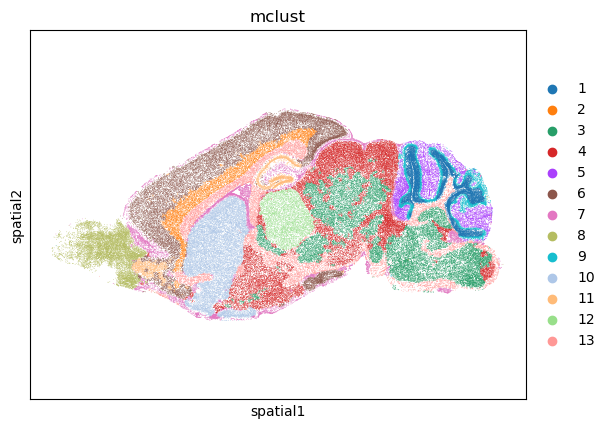

In [24]:
# Display a spatial embedding plot with cell clustering information
ax = sc.pl.embedding(adata,basis='spatial',color=['mclust',],show=False,)
ax.axis('equal')

/home/linsenlin/anaconda3/envs/stagate_sodb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


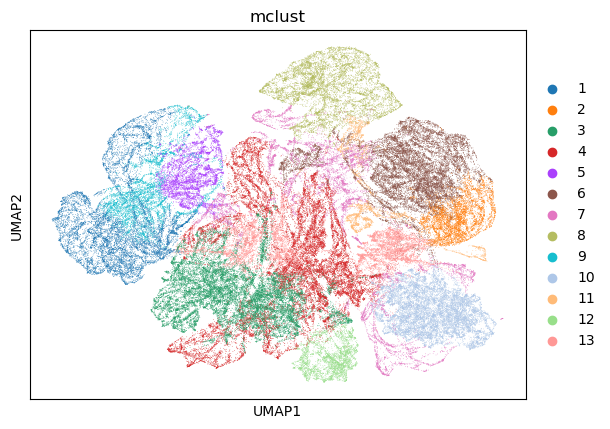

In [25]:
# Display a UMAP plot colored by the mclust cluster
sc.pl.umap(adata, color='mclust')